[ゼロから作るDeep Learning: https://www.oreilly.co.jp/books/9784873117584/](https://www.oreilly.co.jp/books/9784873117584/)

# 7.6 CNNの可視化
## 7.6.1 1層目の重みの可視化

MNISTデータセットに対して、単純なCNNの学習を実施時、畳み込み層(1層目)のフィルターを画像として表示

In [1]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()


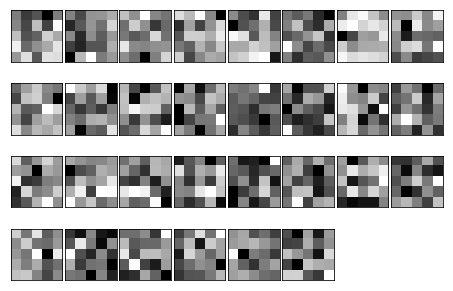

In [2]:
# ランダム初期化後、学習前の重み
filter_show(network.params['W1'])

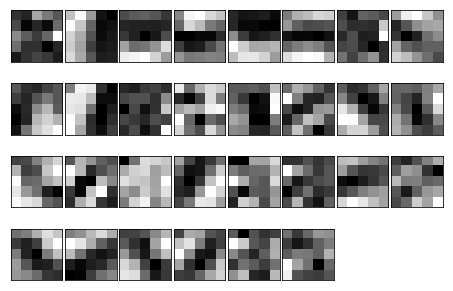

In [3]:
# 学習後の重み
network.load_params("params.pkl")
filter_show(network.params['W1'])

# 考察
- 学習前のフィルターはランダムに初期化されているため、白黒の濃淡には規則性がない。
- 学習を終えたフィルターは規則性のある画像となっている。白から黒へグラデーションを伴って変化するフィルターや、塊のある領域「ブロブ(blob)」を持つフィルターなど、学習によって規則性のあるフィルターへと更新されている。
- 学習後の規則性のあるフィルターは、エッジ(色が変化する境目)やブロブ(局所的に塊のある領域)などを見ている。